# ANKIT KUMAR-ML Support Vector Machine(SVM) Classifier-Indian startups dataset

#  Data Exploration:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'D:\Downloads\Indian Startups.csv')

In [3]:
# Display the first 5 rows
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,AUTHORIZED_CAPITAL,PAIDUP_CAPITAL,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,REGISTERED_OFFICE_ADDRESS,SUB_CATEGORY
0,U55101AN2007PTC000082,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,1000000,100000,26-03-2007,RoC-Chennai,Trading,Golden Rest room Prem Nagar Port Blair Andaman...,Indian Non-Government Company
1,U01111AN2007PTC000087,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,100000,08/06/07 0:00,RoC-Chennai,Agriculture and Allied Activities,Sadha Bhavan Gurudwara Lane Port Blair Andaman...,Indian Non-Government Company
2,U45201AN2007PTC000086,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,2000000,07/11/07 0:00,RoC-Chennai,Construction,Junglighat Port Blair Andaman and Nicobar Isla...,Indian Non-Government Company
3,U62200AN2007PTC000227,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20000000,10000000,20-09-2007,RoC-Chennai,"Transport, storage and Communications","HOUSE NO.M.B-210, PART-II, NEAR INCOME TAX OFF...",Indian Non-Government Company
4,U52190AN1996PTC000053,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2500000,2500000,07/10/96 0:00,RoC-Chennai,Trading,2 Middle Point Port Blair Andaman and Nicobar ...,Indian Non-Government Company


In [4]:
# Check dataset information
print(df.info())

# Get summary statistics for the dataset
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   CORPORATE_IDENTIFICATION_NUMBER  20000 non-null  object
 1   COMPANY_NAME                     20000 non-null  object
 2   COMPANY_STATUS                   20000 non-null  object
 3   COMPANY_CLASS                    20000 non-null  object
 4   COMPANY_CATEGORY                 20000 non-null  object
 5   AUTHORIZED_CAPITAL               20000 non-null  object
 6   PAIDUP_CAPITAL                   19846 non-null  object
 7   DATE_OF_REGISTRATION             19949 non-null  object
 8   REGISTRAR_OF_COMPANIES           20000 non-null  object
 9   PRINCIPAL_BUSINESS_ACTIVITY      19785 non-null  object
 10  REGISTERED_OFFICE_ADDRESS        19999 non-null  object
 11  SUB_CATEGORY                     19998 non-null  object
dtypes: object(12)
memory usage: 1.8+

# Data Preprocessing:

In [5]:
# Check for missing values
print(df.isnull().sum())

CORPORATE_IDENTIFICATION_NUMBER      0
COMPANY_NAME                         0
COMPANY_STATUS                       0
COMPANY_CLASS                        0
COMPANY_CATEGORY                     0
AUTHORIZED_CAPITAL                   0
PAIDUP_CAPITAL                     154
DATE_OF_REGISTRATION                51
REGISTRAR_OF_COMPANIES               0
PRINCIPAL_BUSINESS_ACTIVITY        215
REGISTERED_OFFICE_ADDRESS            1
SUB_CATEGORY                         2
dtype: int64


In [6]:
print("Initial shape:", df.shape)

Initial shape: (20000, 12)


In [7]:
# Drop columns not useful for prediction
df = df.drop(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'REGISTERED_OFFICE_ADDRESS'], axis=1)

In [8]:
# Handle missing values
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (19629, 9)


In [9]:
#  Encode categorical variables
label_enc_cols = ['COMPANY_STATUS']  # Target column
onehot_enc_cols = ['COMPANY_CLASS', 'COMPANY_CATEGORY', 'REGISTRAR_OF_COMPANIES', 
                   'PRINCIPAL_BUSINESS_ACTIVITY', 'SUB_CATEGORY']

In [10]:
# Label Encode the target
le = LabelEncoder()
df['COMPANY_STATUS'] = le.fit_transform(df['COMPANY_STATUS'])

In [11]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=onehot_enc_cols, drop_first=True)

In [12]:
# Convert date and capital columns
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce')
df['REG_YEAR'] = df['DATE_OF_REGISTRATION'].dt.year
df.drop(columns=['DATE_OF_REGISTRATION'], inplace=True)

In [13]:
# Clean capital columns: replace '-' with NaN, remove commas, and convert to float
df['AUTHORIZED_CAPITAL'] = df['AUTHORIZED_CAPITAL'].replace('-', np.nan).str.replace(',', '')
df['PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].replace('-', np.nan).str.replace(',', '')

df['AUTHORIZED_CAPITAL'] = pd.to_numeric(df['AUTHORIZED_CAPITAL'], errors='coerce')
df['PAIDUP_CAPITAL'] = pd.to_numeric(df['PAIDUP_CAPITAL'], errors='coerce')

# Drop rows with any NaNs
df = df.dropna()


In [14]:
# Define X and y
X = df.drop('COMPANY_STATUS', axis=1)
y = df['COMPANY_STATUS']

In [15]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# SVM Implementation:

In [17]:
#  SVM with different kernels

# Define the list of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to store accuracy results for each kernel
results = {}

# Loop through each kernel type
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")

    # Initialize the Support Vector Classifier with the current kernel
    model = SVC(kernel=kernel)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the target on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")

    # Print classification report with all known classes (even if some were not predicted)
    print("Classification Report:")
    print(classification_report(
        y_test, 
        y_pred, 
        labels=np.arange(len(le.classes_)),  # Ensures all label indices are included
        target_names=le.classes_             # Matches label indices with original class names
    ))

    # Print confusion matrix to visualize misclassifications
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Store accuracy result for the current kernel
    results[kernel] = acc


Training SVM with linear kernel...
Accuracy with linear kernel: 0.8326
Classification Report:
                                precision    recall  f1-score   support

                        ACTIVE       0.86      0.94      0.90      1581
            ACTIVE IN PROGRESS       0.00      0.00      0.00         2
                   AMALGAMATED       0.00      0.00      0.00         7
              CONVERTED TO LLP       0.00      0.00      0.00         0
CONVERTED TO LLP AND DISSOLVED       0.00      0.00      0.00         1
                       DORMANT       0.67      0.53      0.59       356
                    LIQUIDATED       0.00      0.00      0.00         0
                    STRIKE OFF       0.00      0.00      0.00        66

                      accuracy                           0.83      2013
                     macro avg       0.19      0.18      0.19      2013
                  weighted avg       0.79      0.83      0.81      2013

Confusion Matrix:
[[1489    0    0    

**Best Performing Kernel**

From the accuracy scores:

>Linear Kernel: 83.26%

>Polynomial Kernel: 81.92%

>RBF Kernel: 82.86%

>Sigmoid Kernel: 80.28%

**Best Kernel = Linear (83.26%)**
So, the linear kernel gives the highest accuracy. This suggests that the data is mostly linearly separable.

**Class-Wise Performance (Classification Report)**
ACTIVE class is predicted well:

>Precision ~ 86%

>Recall ~ 94%

>F1-score ~ 90%

This means that most active companies are correctly classified.

Other classes (STRIKE OFF, DORMANT) are not predicted well:

Precision is 0.00 for ACTIVE IN PROGRESS, AMALGAMATED, LIQUIDATED, CONVERTED TO LLP

This means the model is struggling to identify minority classes.

Possible reason: Imbalanced dataset.

**Confusion Matrix Insights**

Looking at the confusion matrices, we see:

ACTIVE is classified correctly most of the time.

DORMANT is often misclassified as ACTIVE.

Minority classes (AMALGAMATED, CONVERTED TO LLP, STRIKE OFF) are almost never predicted correctly.

These have very low recall.

Possible Fix: Apply class balancing (SMOTE, class weighting).

**Key Takeaways**

✔️ Linear kernel is best → Data is mostly linearly separable.

❌ Poor minority class prediction → Need to handle class imbalance.

📊 Confusion Matrix shows dominant class predictions → Need to improve recall for small classes.

# Model Prediction:

In [18]:
# the best performing kernel based on accuracy
best_kernel = max(results, key=results.get)
print(f"\nBest kernel based on accuracy: {best_kernel}")

# Retrain model using best kernel
best_model = SVC(kernel=best_kernel)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

#Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Best kernel based on accuracy: linear
Accuracy: 0.8028


# Model Evaluation:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

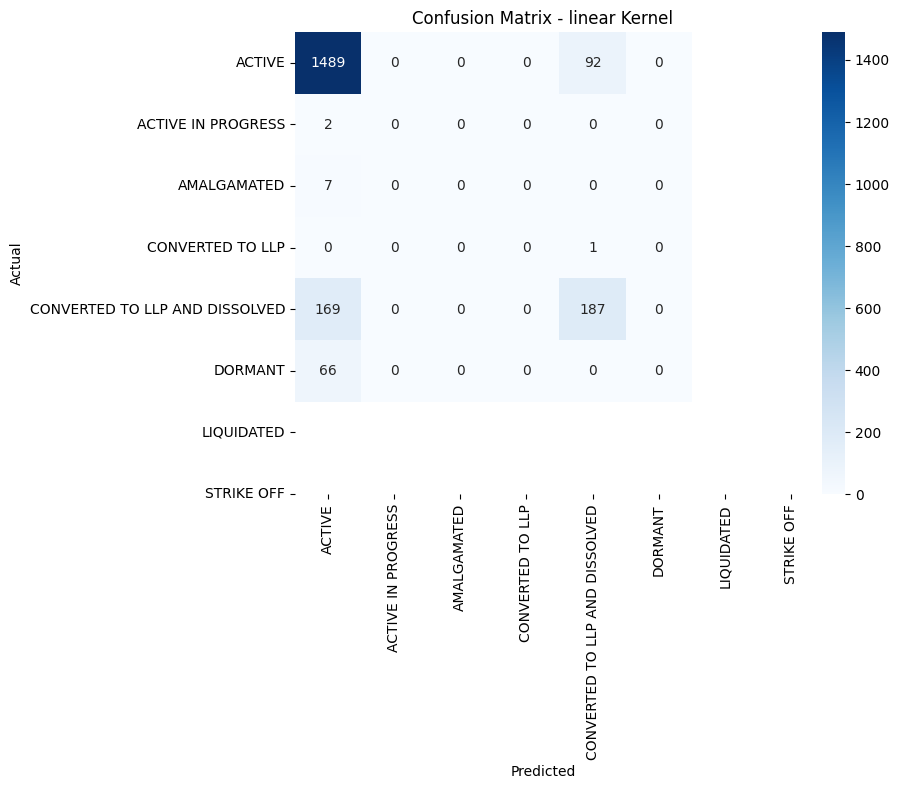

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_kernel} Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
#Classification Report

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred_best,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))


Classification Report:
                                precision    recall  f1-score   support

                        ACTIVE       0.86      0.94      0.90      1581
            ACTIVE IN PROGRESS       0.00      0.00      0.00         2
                   AMALGAMATED       0.00      0.00      0.00         7
              CONVERTED TO LLP       0.00      0.00      0.00         0
CONVERTED TO LLP AND DISSOLVED       0.00      0.00      0.00         1
                       DORMANT       0.67      0.53      0.59       356
                    LIQUIDATED       0.00      0.00      0.00         0
                    STRIKE OFF       0.00      0.00      0.00        66

                      accuracy                           0.83      2013
                     macro avg       0.19      0.18      0.19      2013
                  weighted avg       0.79      0.83      0.81      2013



In [22]:
# Accuracy
acc_best = accuracy_score(y_test, y_pred_best)
print(f"\nOverall Accuracy using {best_kernel} kernel: {acc_best:.4f}")


Overall Accuracy using linear kernel: 0.8326


# visualize the decision boundary created by the SVM models.

In [23]:
from sklearn.decomposition import PCA

In [25]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model on 2D PCA data for visualization
svm_vis = SVC(kernel=best_kernel)
svm_vis.fit(X_train_pca, y_train)

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


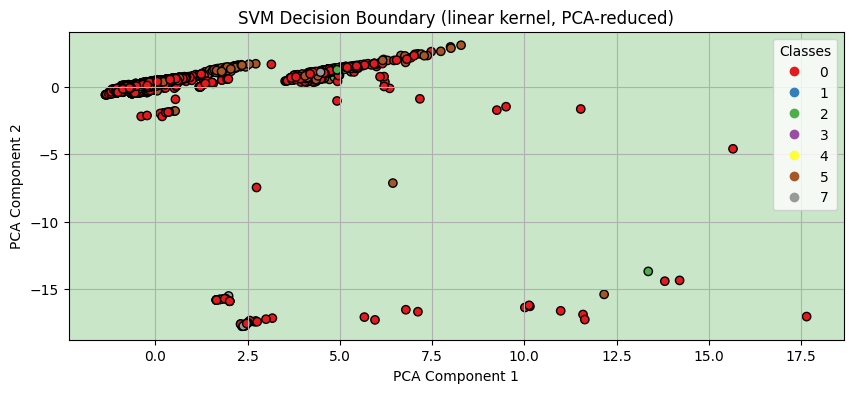

In [26]:
# Plot
plt.figure(figsize=(10, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Set1', edgecolors='k')
plt.title(f"SVM Decision Boundary ({best_kernel} kernel, PCA-reduced)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, labels, title="Classes")
plt.grid(True)
plt.show()

# THE END